Objetivo: Classificar se uma pessoa comprou ou não comprou um produto com base no salário ou na idade

In [34]:
# importa biblioteca pandas
import pandas as pd 

In [35]:
df = pd.read_csv('Social_Network_Ads.csv',sep=',') # importa a base de dados

In [36]:
df.head() # exibe as primeiras linhas do Dataframe

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
# cria o dicionário
colunas = {'User ID': 'Usuario',
           'Gender': 'Genero',
           'Age': 'Idade','EstimatedSalary':'Salario Estimado',
           'Purchased': 'Comprou'}

In [38]:
df.rename(columns=colunas,inplace=True) # renomeia as colunas

In [39]:
df.head()

,Usuario,Genero,Idade,Salario Estimado,Comprou
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Importando as bibliotecas necessárias para realizar a análise de dados

In [40]:
import numpy as np #importa a biblioteca numpy
import matplotlib.pyplot as plt
from sklearn.svm import SVC #importa o algoritmo de svm
from sklearn.preprocessing import StandardScaler # biblioteca para normalizar os dados
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score # biblioteca para gerar as métricas
from matplotlib.colors import ListedColormap # biblioteca para alterar cor dos gráficos

Selecionando as colunas do dataset

In [41]:
X = df.iloc[:, [2, 3]].values # x é a entrada onde pega a idade e a renda dos clientes
y = df.iloc[:, -1].values # y é a saida

In [42]:
X # exibe os valores

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [43]:
y # exibe os valores

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

Dividindo os dados em treino e teste

In [44]:
from sklearn.model_selection import train_test_split # biblioteca para dividir
# os dados em treino e teste
X_treino,X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3,
                                                       random_state=3)

Normalizando os dados com StandScaller

In [45]:
sc = StandardScaler() # biblioteca para normalizar os dados

In [46]:
X_treino = sc.fit_transform(X_treino) # realiza a transformação dos dados
X_teste = sc.fit_transform(X_teste)# realiza a transformação dos dados

In [47]:
# Cria o algoritmo de machine learning e treinando o algoritmo SVM
algoritmo = SVC(kernel='linear',random_state=3) # Kernel é a equação do modelo svm

In [48]:
# treinando o modelo
algoritmo.fit(X_treino,y_treino) # treina o modelo com os dados de entrada para cada saida

SVC(kernel='linear', random_state=3)

In [49]:
# gerando previsão dos resultados
y_prev = algoritmo.predict(X_teste) # realizando a predição dos valores

In [50]:
X_teste

array([[ 0.88051148,  0.12484894],
       [ 0.98171969, -1.25765908],
       [ 2.19621829, -1.14480128],
       [-1.75090214, -0.58051229],
       [-1.04244462,  0.54806568],
       [ 0.27326218,  0.23770674],
       [ 1.38655256, -1.31408798],
       [-1.44727749, -0.60872674],
       [ 0.67809505, -0.86265679],
       [-1.04244462, -1.48337467],
       [ 0.3744704 , -0.27015335],
       [ 0.17205397, -0.77801344],
       [ 0.88051148,  0.51985123],
       [-0.2327789 , -0.4676545 ],
       [-1.14365284, -1.06015793],
       [-1.34606927, -1.42694577],
       [-0.73881998, -0.58051229],
       [-1.34606927,  0.40699343],
       [-0.03036246,  1.90235924],
       [ 0.27326218, -0.27015335],
       [-0.53640354,  0.46342233],
       [-0.33398711, -1.25765908],
       [-0.84002819,  0.29413563],
       [ 0.47567862, -0.12908111],
       [-0.43519533,  1.22521246],
       [-0.63761176, -0.32658225],
       [ 0.47567862, -0.43944005],
       [ 1.48776077,  2.26914708],
       [ 0.3744704 ,

In [51]:
x_test_padrao = sc.inverse_transform(X_teste)

In [52]:
x_test_padrao

array([[4.60e+01, 7.40e+04],
       [4.70e+01, 2.50e+04],
       [5.90e+01, 2.90e+04],
       [2.00e+01, 4.90e+04],
       [2.70e+01, 8.90e+04],
       [4.00e+01, 7.80e+04],
       [5.10e+01, 2.30e+04],
       [2.30e+01, 4.80e+04],
       [4.40e+01, 3.90e+04],
       [2.70e+01, 1.70e+04],
       [4.10e+01, 6.00e+04],
       [3.90e+01, 4.20e+04],
       [4.60e+01, 8.80e+04],
       [3.50e+01, 5.30e+04],
       [2.60e+01, 3.20e+04],
       [2.40e+01, 1.90e+04],
       [3.00e+01, 4.90e+04],
       [2.40e+01, 8.40e+04],
       [3.70e+01, 1.37e+05],
       [4.00e+01, 6.00e+04],
       [3.20e+01, 8.60e+04],
       [3.40e+01, 2.50e+04],
       [2.90e+01, 8.00e+04],
       [4.20e+01, 6.50e+04],
       [3.30e+01, 1.13e+05],
       [3.10e+01, 5.80e+04],
       [4.20e+01, 5.40e+04],
       [5.20e+01, 1.50e+05],
       [4.10e+01, 7.90e+04],
       [4.60e+01, 2.30e+04],
       [4.40e+01, 1.39e+05],
       [2.80e+01, 3.20e+04],
       [4.20e+01, 1.04e+05],
       [4.60e+01, 9.60e+04],
       [3.50e+

Gerando matriz de confusão

In [53]:
cm = confusion_matrix(y_teste, y_prev)
print(cm)

[[72  6]
 [13 29]]


Gerando a matriz de confusão de forma gráfica

In [54]:
import seaborn as sns # importa a biblioteca seaborn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Usuario           400 non-null    int64 
 1   Genero            400 non-null    object
 2   Idade             400 non-null    int64 
 3   Salario Estimado  400 non-null    int64 
 4   Comprou           400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


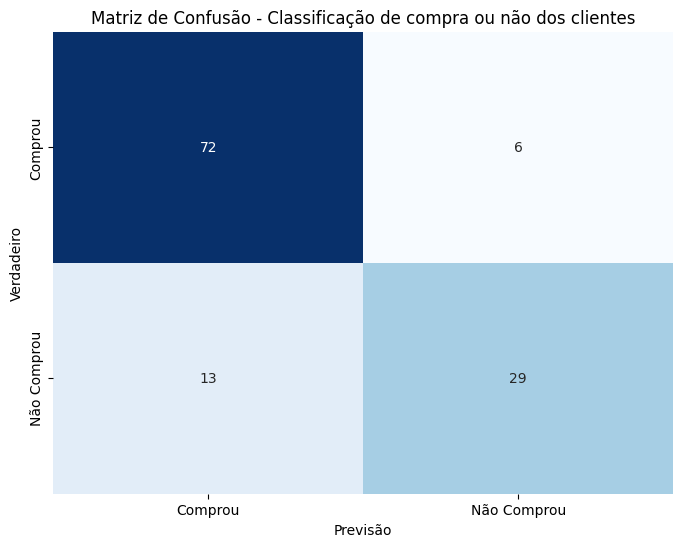

In [55]:
plt.figure(figsize=(8,6))
print(df.info())
# sns.heatmap(informação a ser exibida, exibir valores, cor, cbar, rotulos dos eixos)
sns.heatmap(cm,annot= True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Comprou','Não Comprou'],yticklabels=['Comprou','Não Comprou'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de compra ou não dos clientes')
plt.show()

In [56]:
# acuracia = VP +VN /Total
acc = accuracy_score(y_teste,y_prev)
acc

0.8416666666666667

In [57]:
# precisao = VP / (VP + FN)
prec = precision_score(y_teste,y_prev)
prec

0.8285714285714286

# f1_score
F1_score é a métrica mais completa para avaliar um modelo de machine learning pois
leva em consideração além dos verdadeiros positivos e verdadeiros negativos, os falsos positivos
 e falso negativo

In [58]:

f1 = f1_score(y_teste,y_prev)
f1

0.7532467532467533